In [82]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 16 columns):
age               1007 non-null int64
job               1007 non-null object
marital           1007 non-null object
education         1007 non-null object
default           1007 non-null object
housing           1007 non-null object
loan              1007 non-null object
contact           1007 non-null object
day_of_week       1007 non-null object
campaign          1007 non-null int64
pdays             1007 non-null int64
poutcome          1007 non-null object
cons_price_idx    1007 non-null float64
cons_conf_idx     1007 non-null float64
prime_rate        1007 non-null float64
y                 1007 non-null object
dtypes: float64(3), int64(3), object(10)
memory usage: 126.0+ KB


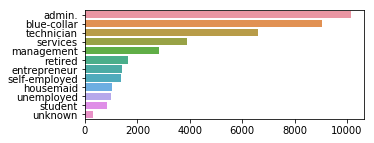

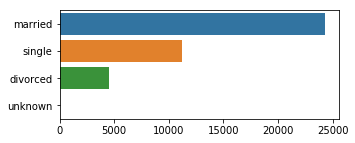

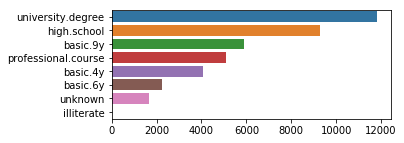

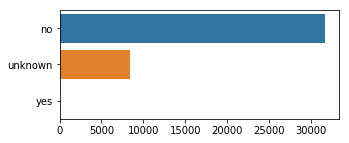

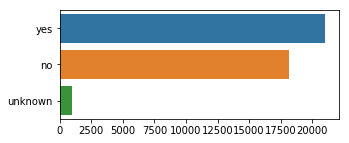

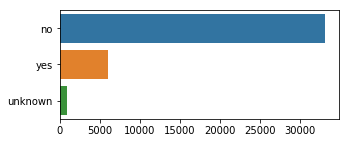

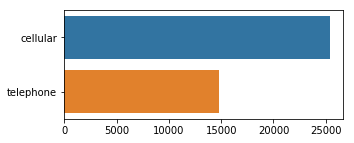

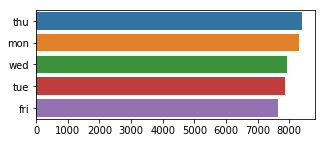

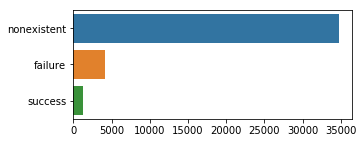

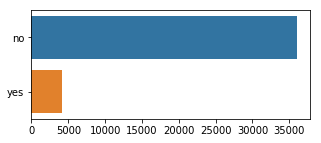

In [83]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'housing','loan', 'contact',  'day_of_week', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(5,2))
    sns.barplot(data[col].value_counts().values, data[col].value_counts().index)

In [84]:

variables = ['education','job','housing','loan']
for k in variables:
    data[k + '_un'] = (data[k] == 'unknown').astype(int)
variables = ['education','job','housing','loan']
for k in variables:
    p[k + '_un'] = (p[k] == 'unknown').astype(int)
def ct(data,f1,f2):
    jobs=list(data[f1].unique())
    edu=list(data[f2].unique())
    dataframes=[]
    for e in edu:
        datae=data[data[f2]==e]
        dataejob=datae.groupby(f1).count()[f2]
        dataframes.append(dataejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx


In [85]:
ct(data,'job','education')

/Users/parkerjiang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  app.launch_new_instance()


,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
admin.,74,3254,150,487,353,242,5578,1.0
blue-collar,2284,853,1395,3550,439,444,89,8.0
entrepreneur,133,228,68,206,133,57,604,2.0
housemaid,461,171,77,92,55,41,137,1.0
management,98,289,81,161,84,118,2006,0.0
retired,569,271,73,139,232,91,275,3.0
self-employed,91,116,24,212,161,27,751,3.0
services,127,2632,221,384,215,146,170,0.0
student,26,343,12,95,42,162,165,0.0
technician,56,851,86,375,3247,206,1768,0.0


In [86]:
ct(p,'job','education')

/Users/parkerjiang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  app.launch_new_instance()


,basic.9y,basic.6y,high.school,basic.4y,university.degree,unknown,professional.course
admin.,12.0,1.0,75,3.0,175,7.0,10
blue-collar,73.0,31.0,25,34.0,5,10.0,14
entrepreneur,4.0,3.0,6,4.0,6,0.0,2
housemaid,2.0,0.0,3,13.0,2,1.0,4
management,5.0,4.0,9,2.0,57,5.0,5
retired,6.0,2.0,5,28.0,10,7.0,9
self-employed,8.0,1.0,2,2.0,14,2.0,7
services,4.0,5.0,50,5.0,3,4.0,3
student,4.0,1.0,14,0.0,5,5.0,1
technician,9.0,1.0,22,2.0,41,6.0,73


In [87]:
data.loc[(data['age']>62) & (data['job']=='unknown'), 'job'] = 'retired'
data.loc[(data['education']=='unknown') & (data['job']=='management'), 'education'] = 'university.degree'
data.loc[(data['education']=='unknown') & (data['job']=='admin'), 'education'] = 'university.degree'
data.loc[(data['education']=='unknown') & (data['job']=='entreperneur'), 'education'] = 'university.degree'
data.loc[(data['education']=='unknown') & (data['job']=='services'), 'education'] = 'high.school'
data.loc[(data['education']=='unknown') & (data['job']=='housemaid'), 'education'] = 'high.school'
data.loc[(data['job']=='unknown') & (data['education']=='professional.course'), 'job'] = 'technician'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.9y'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.6y'), 'job'] = 'blue-collar'


In [88]:
p.loc[(p['age']>62) & (p['job']=='unknown'), 'job'] = 'retired'
p.loc[(p['education']=='unknown') & (p['job']=='management'), 'education'] = 'university.degree'
p.loc[(data['education']=='unknown') & (p['job']=='admin'), 'education'] = 'university.degree'
p.loc[(data['education']=='unknown') & (p['job']=='entreperneur'), 'education'] = 'university.degree'
p.loc[(p['education']=='unknown') & (p['job']=='services'), 'education'] = 'high.school'
p.loc[(p['education']=='unknown') & (p['job']=='housemaid'), 'education'] = 'high.school'
p.loc[(p['job']=='unknown') & (p['education']=='professional.course'), 'job'] = 'technician'
p.loc[(p['job'] == 'unknown') & (p['education']=='basic.9y'), 'job'] = 'blue-collar'
p.loc[(p['job'] == 'unknown') & (p['education']=='basic.6y'), 'job'] = 'blue-collar'




In [89]:
ct(data,'job','education')

/Users/parkerjiang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  app.launch_new_instance()


,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
admin.,74,3254,150.0,487.0,353.0,242.0,5578,1.0
blue-collar,2284,853,1417.0,3581.0,439.0,444.0,89,8.0
entrepreneur,133,228,68.0,206.0,133.0,57.0,604,2.0
housemaid,461,212,77.0,92.0,55.0,0.0,137,1.0
management,98,289,81.0,161.0,84.0,0.0,2124,0.0
retired,570,271,73.0,139.0,233.0,104.0,276,3.0
self-employed,91,116,24.0,212.0,161.0,27.0,751,3.0
services,127,2778,221.0,384.0,215.0,0.0,170,0.0
student,26,343,12.0,95.0,42.0,162.0,165,0.0
technician,56,851,86.0,375.0,3257.0,206.0,1768,0.0


In [90]:
jobhousing=ct(data,'job','housing')
jobloan=ct(data,'job','loan')

In [91]:
ct(p,'job','education')
jobhousing=ct(p,'job','housing')
jobloan=ct(p,'job','loan')

/Users/parkerjiang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  app.launch_new_instance()


In [92]:
def jb(data,jobhousing):
    
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    house=["yes","no"]
    for j in jobs:
        o1=(data[np.logical_and(np.array(data['housing']=='unknown'),np.array(data['job']==j))].index)[(np.random.rand(len(data[np.logical_and(np.array(data['housing']=='unknown'),np.array(data['job']==j))].index))<((jobhousing.loc[j]['no'])/(jobhousing.loc[j]['no']+jobhousing.loc[j]['yes'])))]
        o2=(data[np.logical_and(np.array(data['housing']=='unknown'),np.array(data['job']==j))].index)[~(np.random.rand(len(data[np.logical_and(np.array(data['housing']=='unknown'),np.array(data['job']==j))].index))<((jobhousing.loc[j]['no'])/(jobhousing.loc[j]['no']+jobhousing.loc[j]['yes'])))]
        data.loc[o1,"housing"]='no'
        data.loc[o2,"housing"]='yes'
    return data

In [93]:
df=jb(data,jobhousing)
df=jb(data,jobloan)

In [94]:
dfp=jb(p,jobhousing)
dfp=jb(p,jobloan)

In [95]:
num= ['age','campaign', 'pdays', 'cons_price_idx','cons_conf_idx','prime_rate']
                    
data[num].describe()

,age,campaign,pdays,cons_price_idx,cons_conf_idx,prime_rate
count,40181.000000,40181.000000,40181.000000,40181.000000,40181.000000,40181.000000
mean,40.009731,2.573405,964.353923,93.578309,-40.506769,3.638561
std,10.360507,2.774774,182.216275,0.577601,4.610277,1.727104
min,17.000000,1.000000,0.000000,92.201000,-50.800000,0.634000
25%,32.000000,1.000000,999.000000,93.075000,-42.700000,1.344000
50%,38.000000,2.000000,999.000000,93.798000,-41.800000,4.857000
75%,47.000000,3.000000,999.000000,93.994000,-36.400000,4.961000
max,98.000000,56.000000,999.000000,94.767000,-26.900000,5.045000


In [97]:
pd.crosstab(df['pdays'],df['poutcome'], values=df['age'], aggfunc='count', normalize=True)

poutcome,failure,nonexistent,success
pdays,,,
0,0.000000,0.000000,0.000373
1,0.000000,0.000000,0.000597
2,0.000000,0.000000,0.001394
3,0.000100,0.000000,0.009880
4,0.000050,0.000000,0.002638
5,0.000100,0.000000,0.000995
6,0.000597,0.000000,0.008885
7,0.000348,0.000000,0.001020
8,0.000124,0.000000,0.000299


In [98]:
data['pdays_missing'] = 0
data['pdays_less_5'] = 0
data['pdays_more_5'] = 0
data['pdays_missing'][data['pdays']==999] = 1
data['pdays_less_5'][data['pdays']<5] = 1
data['pdays_more_5'][(data['pdays']>5) & (data['pdays']<999)] = 1
data_dropped = data.drop('pdays', axis=1);

/Users/parkerjiang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/parkerjiang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/parkerjiang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [99]:
p['pdays_missing'] = 0
p['pdays_less_5'] = 0
p['pdays_more_5'] = 0
p['pdays_missing'][p['pdays']==999] = 1
p['pdays_less_5'][p['pdays']<5] = 1
p['pdays_more_5'][(p['pdays']>5) & (p['pdays']<999)] = 1
p_dropped = p.drop('pdays', axis=1);

/Users/parkerjiang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/parkerjiang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/parkerjiang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [100]:
data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40181 entries, 0 to 40180
Data columns (total 22 columns):
age               40181 non-null int64
job               40181 non-null object
marital           40181 non-null object
education         40181 non-null object
default           40181 non-null object
housing           40181 non-null object
loan              40181 non-null object
contact           40181 non-null object
day_of_week       40181 non-null object
campaign          40181 non-null int64
poutcome          40181 non-null object
cons_price_idx    40181 non-null float64
cons_conf_idx     40181 non-null float64
prime_rate        40181 non-null float64
y                 40181 non-null object
education_un      40181 non-null int64
job_un            40181 non-null int64
housing_un        40181 non-null int64
loan_un           40181 non-null int64
pdays_missing     40181 non-null int64
pdays_less_5      40181 non-null int64
pdays_more_5      40181 non-null int64
dtypes: float64(3

In [101]:
data_dummies=pd.get_dummies(data_dropped)
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40181 entries, 0 to 40180
Data columns (total 57 columns):
age                              40181 non-null int64
campaign                         40181 non-null int64
cons_price_idx                   40181 non-null float64
cons_conf_idx                    40181 non-null float64
prime_rate                       40181 non-null float64
education_un                     40181 non-null int64
job_un                           40181 non-null int64
housing_un                       40181 non-null int64
loan_un                          40181 non-null int64
pdays_missing                    40181 non-null int64
pdays_less_5                     40181 non-null int64
pdays_more_5                     40181 non-null int64
job_admin.                       40181 non-null uint8
job_blue-collar                  40181 non-null uint8
job_entrepreneur                 40181 non-null uint8
job_housemaid                    40181 non-null uint8
job_management       

In [102]:
p_dummies=pd.get_dummies(p_dropped)
p_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 54 columns):
age                              1007 non-null int64
campaign                         1007 non-null int64
cons_price_idx                   1007 non-null float64
cons_conf_idx                    1007 non-null float64
prime_rate                       1007 non-null float64
education_un                     1007 non-null int64
job_un                           1007 non-null int64
housing_un                       1007 non-null int64
loan_un                          1007 non-null int64
pdays_missing                    1007 non-null int64
pdays_less_5                     1007 non-null int64
pdays_more_5                     1007 non-null int64
job_admin.                       1007 non-null uint8
job_blue-collar                  1007 non-null uint8
job_entrepreneur                 1007 non-null uint8
job_housemaid                    1007 non-null uint8
job_management                   1007 n

In [103]:
def drop(data,f):
    
    data=data.drop(f,axis=1)
    return data

In [104]:
features = ['default_no','housing_no','loan_no','y_no','marital_single','contact_cellular',
                    'education_unknown','job_unknown','housing_unknown','loan_unknown', 'pdays_less_5']
cd = drop(data_dummies, features)
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40181 entries, 0 to 40180
Data columns (total 46 columns):
age                              40181 non-null int64
campaign                         40181 non-null int64
cons_price_idx                   40181 non-null float64
cons_conf_idx                    40181 non-null float64
prime_rate                       40181 non-null float64
education_un                     40181 non-null int64
job_un                           40181 non-null int64
housing_un                       40181 non-null int64
loan_un                          40181 non-null int64
pdays_missing                    40181 non-null int64
pdays_more_5                     40181 non-null int64
job_admin.                       40181 non-null uint8
job_blue-collar                  40181 non-null uint8
job_entrepreneur                 40181 non-null uint8
job_housemaid                    40181 non-null uint8
job_management                   40181 non-null uint8
job_retired          

In [105]:
features = ['default_no','housing_no','loan_no','marital_single','contact_cellular',
                    'education_unknown','job_unknown', 'job_unknown','pdays_less_5']
cp = drop(p_dummies, features)


In [106]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40181 entries, 0 to 40180
Data columns (total 46 columns):
age                              40181 non-null int64
campaign                         40181 non-null int64
cons_price_idx                   40181 non-null float64
cons_conf_idx                    40181 non-null float64
prime_rate                       40181 non-null float64
education_un                     40181 non-null int64
job_un                           40181 non-null int64
housing_un                       40181 non-null int64
loan_un                          40181 non-null int64
pdays_missing                    40181 non-null int64
pdays_more_5                     40181 non-null int64
job_admin.                       40181 non-null uint8
job_blue-collar                  40181 non-null uint8
job_entrepreneur                 40181 non-null uint8
job_housemaid                    40181 non-null uint8
job_management                   40181 non-null uint8
job_retired          

In [107]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 46 columns):
age                              1007 non-null int64
campaign                         1007 non-null int64
cons_price_idx                   1007 non-null float64
cons_conf_idx                    1007 non-null float64
prime_rate                       1007 non-null float64
education_un                     1007 non-null int64
job_un                           1007 non-null int64
housing_un                       1007 non-null int64
loan_un                          1007 non-null int64
pdays_missing                    1007 non-null int64
pdays_more_5                     1007 non-null int64
job_admin.                       1007 non-null uint8
job_blue-collar                  1007 non-null uint8
job_entrepreneur                 1007 non-null uint8
job_housemaid                    1007 non-null uint8
job_management                   1007 non-null uint8
job_retired                      1007 n

In [108]:
cd.head()

,age,campaign,cons_price_idx,cons_conf_idx,prime_rate,education_un,job_un,housing_un,loan_un,pdays_missing,...,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,93.994,-36.4,4.857,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
1,57,1,93.994,-36.4,4.857,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
2,37,1,93.994,-36.4,4.857,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
3,40,1,93.994,-36.4,4.857,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
4,56,1,93.994,-36.4,4.857,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0


In [109]:

#Seperating Target variable from other variables
dataset_Y = cd['y_yes']
dataset_X = cd[cd.columns[0:43]]
X = dataset_X.values
Y = dataset_Y.values
from sklearn.model_selection import train_test_split
# Split-out validation dataset
validation_size = 0.8
seed = 5
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [110]:

logmodel = LogisticRegression()

logmodel.fit(X_train,Y_train)
predictions = logmodel.predict(X_validation)
prediction = logmodel.predict(cp[cp.columns[0:43]])

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_validation,predictions))
print(confusion_matrix(predictions,Y_validation ))
predictionssss = pd.DataFrame(prediction, columns=['y']).to_csv('fut.csv')

             precision    recall  f1-score   support

          0       0.91      0.99      0.95     28847
          1       0.65      0.19      0.29      3298

avg / total       0.89      0.91      0.88     32145

[[28504  2670]
 [  343   628]]


In [111]:
##print(predictionssss)